# Developement of Churn Model for Telecom

#### Opportunity statement: Due to increasing churn rate of customers from last several quarters, the company has decided to dive deep into factors driving it. Past efforts in retaining customers have been reactive where the suggested steps were applied at the point of no return. The idea is to use machine learning to predict the likelihood of churn for each customer and reasons behind it.

In [4]:
# Import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# upload telecom churn data
data_churn = pd.read_csv(r"C:\IITR_DSML_08\Capstone Project\Telco-Customer-Churn.csv")

In [6]:
#displaying the first 5 rows
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data_churn.shape

(7043, 21)

In [8]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Converting total charges column to float
data_churn["TotalCharges"] = pd.to_numeric(data_churn['TotalCharges'], errors='coerce')

In [10]:
# Identify missing values
data_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# There are 11 missing values in the Total charges, Let us replace these missing values with the median of that feature

In [12]:
data_churn["TotalCharges"]= data_churn["TotalCharges"].fillna(data_churn["TotalCharges"].median())

In [13]:
# There are 11 missing values in the Total charges, Let us replace these missing values with the median of that feature

In [14]:
data_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
print(data_churn.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [16]:
# dropping customer Id column
data_churn = data_churn.drop('customerID',axis=1)

In [17]:
# reprinting columns to ensure customer ID field is dropped from the dataframe
print(data_churn.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [18]:
numerical_cols = ["tenure","MonthlyCharges","TotalCharges"]

In [19]:
data_churn[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [20]:
# Standard deviation for Total Charges is high as compared to other numerical features

## Exploratory Data Analysis

In [21]:
#let us look at target variable "Churn"
## Convert churn column into y since it is our target variable
data_churn.rename(columns={"Churn":"y"},inplace=True)

In [22]:
#Let us look at the distribution of target label
data_churn["y"].value_counts(normalize="True")

y
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_12104\2584228039.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data_churn,palette="viridis")


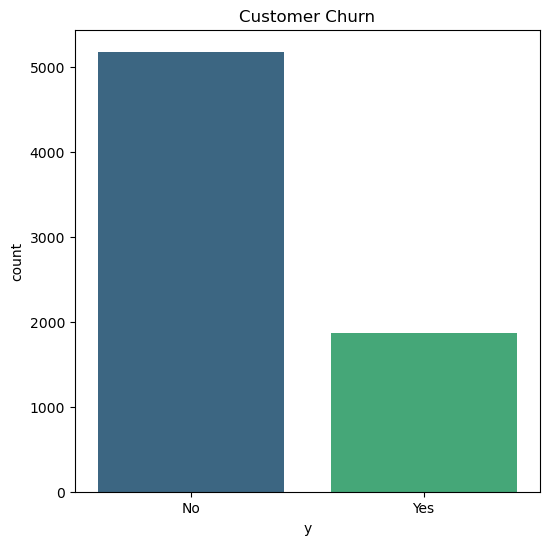

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
#Target Feature , Y
plt.figure(figsize=(6,6))
sns.countplot(x='y', data=data_churn,palette="viridis")
plt.title('Customer Churn')
plt.show()

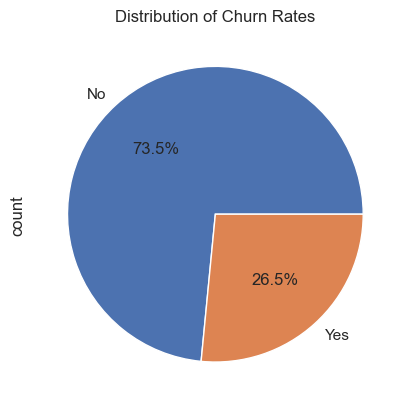

In [24]:
# Let us also look at the % wise distribution basis pie chart
sns.set_theme(style="whitegrid")
data_churn['y'].value_counts().plot.pie(autopct = '%.1f%%')
plt.title('Distribution of Churn Rates')
plt.show()

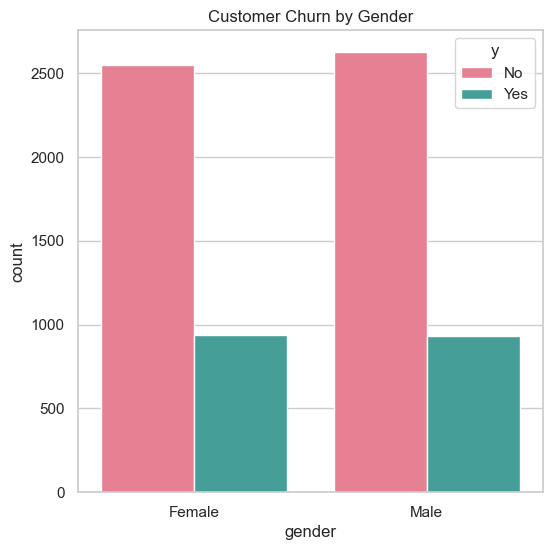

In [25]:
# let us now start looking at feature columns
# start with 'Gender'
plt.figure(figsize=(6,6))
sns.countplot(x='gender', data=data_churn, hue='y',palette="husl")
plt.title('Customer Churn by Gender')
plt.show()
# Gender has no such impact on customer churn

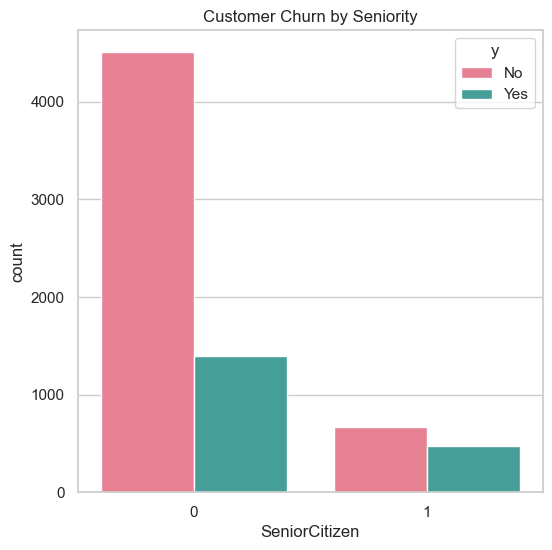

In [26]:
# Sr. Citizen column
plt.figure(figsize=(6,6))
sns.countplot(x='SeniorCitizen', data=data_churn, hue='y',palette="husl")
plt.title('Customer Churn by Seniority')
plt.show()

In [27]:
Srcitizen_y = pd.crosstab(index = data_churn['SeniorCitizen'], columns = data_churn['y'])
Srcitizen_y

y,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


In [28]:
# It is clear from the above table that Sr. Citizens has high churn rate which is as high as ~40%

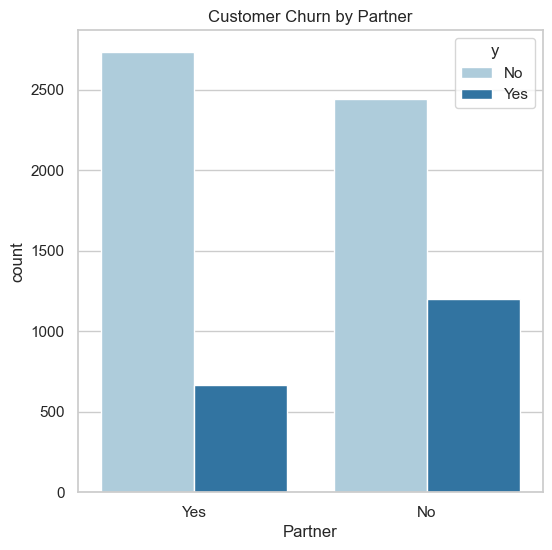

In [29]:
# Partner column
plt.figure(figsize=(6,6))
sns.countplot(x='Partner', data=data_churn, hue='y',palette="Paired")
plt.title('Customer Churn by Partner')
plt.show()

In [30]:
partner_y = pd.crosstab(index = data_churn['Partner'], columns = data_churn['y'])
partner_y

y,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


In [31]:
# It is evident from the above table that customers who do not have any partner has higher churn rate which is as high as 33%

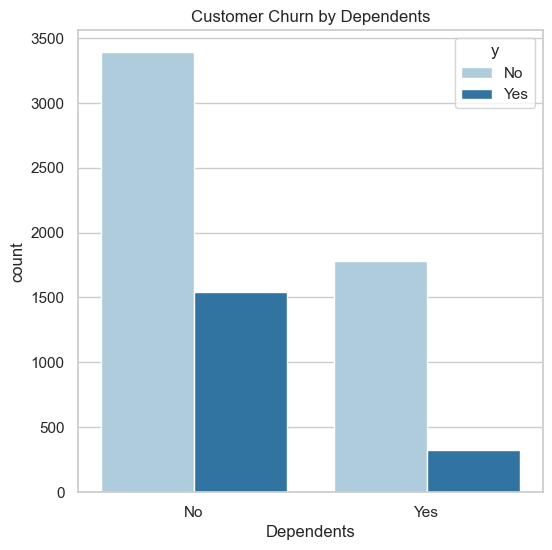

In [32]:
# Dependents column
plt.figure(figsize=(6,6))
sns.countplot(x='Dependents', data=data_churn, hue='y',palette="Paired")
plt.title('Customer Churn by Dependents')
plt.show()

In [33]:
dependents_y = pd.crosstab(index = data_churn['Dependents'], columns = data_churn['y'])
dependents_y

y,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


In [34]:
# It is evident from the above table that customers who do not have any dependents have higher churn rate which is as high as 31%

In [35]:
## Let us look at a tenure column, since it is a continous column, let us look at the distribution of this column

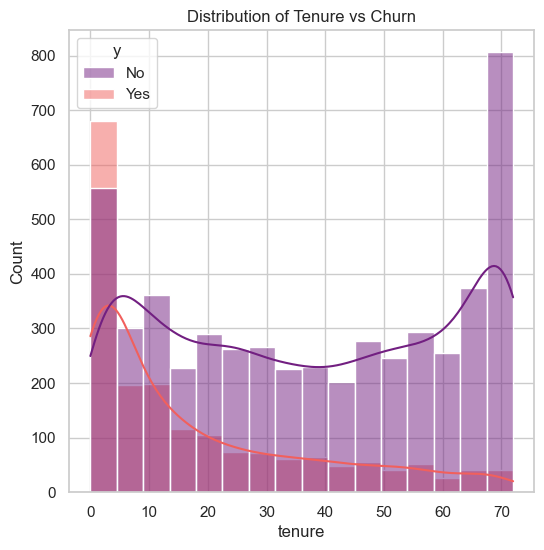

In [36]:
plt.figure(figsize=(6,6))
sns.histplot(data = data_churn, x= "tenure", hue="y",kde= True,palette="magma")
plt.title("Distribution of Tenure vs Churn")
plt.show()

In [37]:
# It is evident from the above plot:
##As tenure increases, the customer churn rate decreases
##Customers with tenure betwee 0-10 months has the higher churn rate
### customers with highest tenure has lowest churn rate

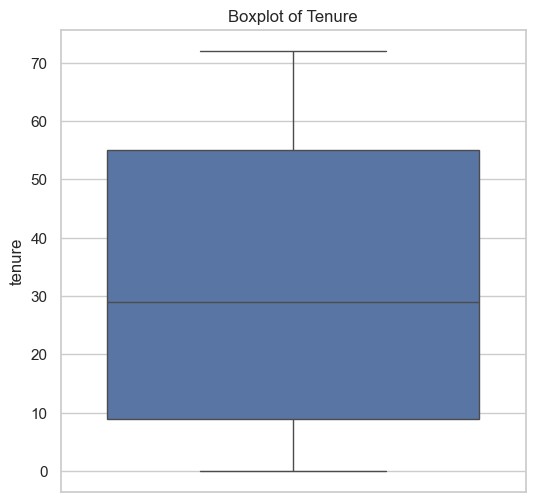

In [38]:
# Let us also create a box plot to understand distribution of tenure to see any outliers
plt.figure(figsize=(6,6))
sns.boxplot(data = data_churn, y= "tenure")
plt.title("Boxplot of Tenure")
plt.show()

In [39]:
## There are no outliers in the tenure column

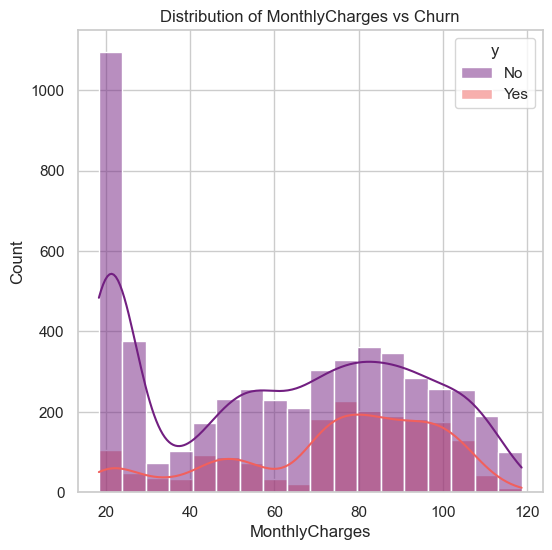

In [40]:
# Let us look at other two numerical cols, monthly charges and Total charges
# Monthly charges
plt.figure(figsize=(6,6))
sns.histplot(data = data_churn, x= "MonthlyCharges", hue="y",kde= True,palette="magma")
plt.title("Distribution of MonthlyCharges vs Churn")
plt.show()

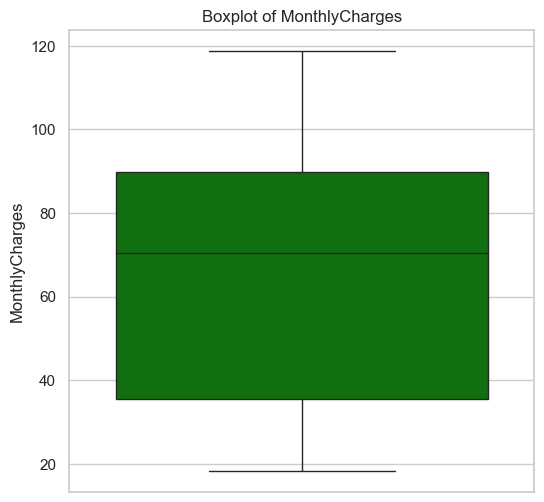

In [41]:
# Let us also create a box plot to understand distribution of Monthly Charges to see any outliers
plt.figure(figsize=(6,6))
sns.set_theme(style ="whitegrid")
sns.boxplot(data = data_churn, y= "MonthlyCharges", color = "green")
plt.title("Boxplot of MonthlyCharges")
plt.show()

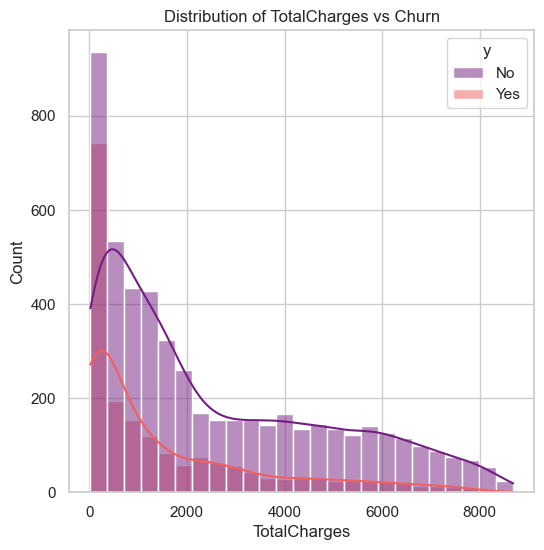

In [42]:
# Total charges
plt.figure(figsize=(6,6))
sns.histplot(data = data_churn, x= "TotalCharges", hue="y",kde= True,palette="magma")
plt.title("Distribution of TotalCharges vs Churn")
plt.show()

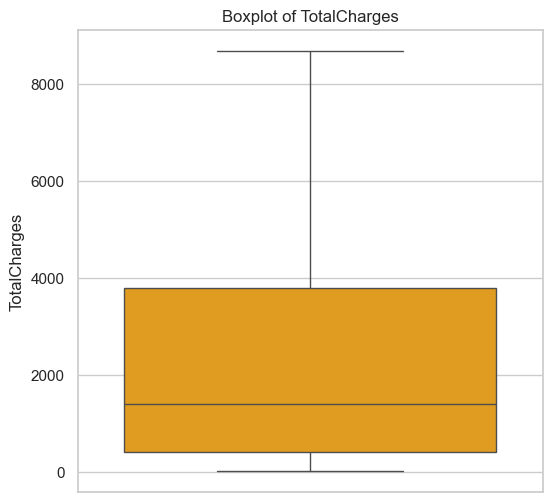

In [43]:
# Let us also create a box plot to understand distribution of Total Charges to see any outliers
plt.figure(figsize=(6,6))
sns.set_theme(style ="whitegrid")
sns.boxplot(data = data_churn, y= "TotalCharges", color ="orange")
plt.title("Boxplot of TotalCharges")
plt.show()

In [44]:
#Monthly charges insights:
# Churn rate seems to be high where monthly charges are between 70 to 100
# There are no outliers found on monthly charges column

In [45]:
#Total charges insights:
# Distribution of Total charges is skewed towards right
# There are no outliers found on Total charges column
# As the total charges increases the churn rate is decreasing

In [46]:
# Let us craete a correlation matrix between Tenure, Monthly Charges and Total Charges
# Let us create a numerical_cols list
numerical_cols = ["MonthlyCharges","TotalCharges","tenure"]

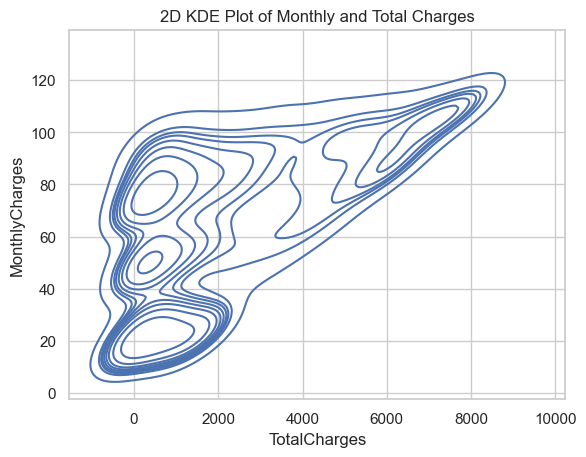

In [47]:
sns.set_theme(style="whitegrid")
sns.kdeplot(data=data_churn, x="TotalCharges", y="MonthlyCharges")
plt.title("2D KDE Plot of Monthly and Total Charges")
plt.show()

In [48]:
# It is evident from above KDE plot that there are high density of  customers who are at a lower end of the segment between 0-2000 total charges and 20-40
# There’s a positive trend, with higher TotalCharges associated with higher MonthlyCharges
## Outliers at higher charges represent a smaller group of high-revenue customers

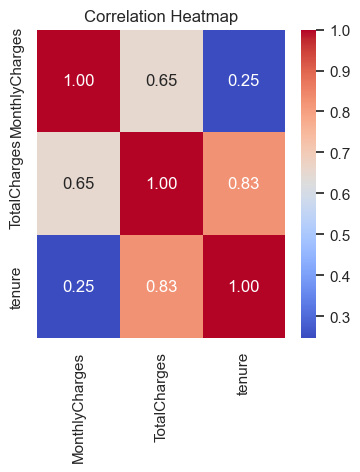

In [49]:
plt.figure(figsize=(4,4))
correlation_matrix = data_churn[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Figure size 600x600 with 0 Axes>

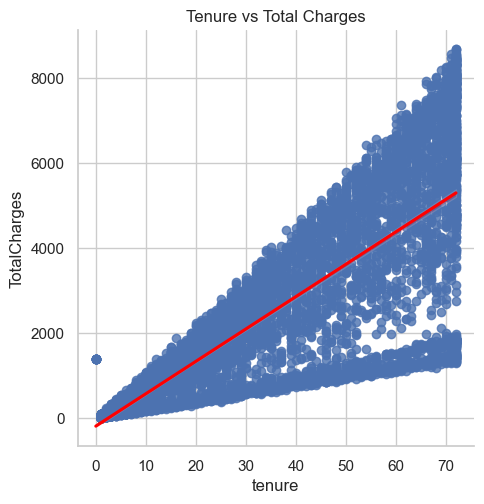

In [50]:
# scatter plot between Monthly charges and Tenure
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.lmplot(x='tenure', y = "TotalCharges",data=data_churn,line_kws={"color": "red"})
plt.title("Tenure vs Total Charges")
plt.show()

In [48]:
# There is a strong correlation between Tenure and Total charges, we can drop one of the feature before model building preferably Total Charges column since it has higher variance

In [49]:
# Let us know focus back on categorical columns

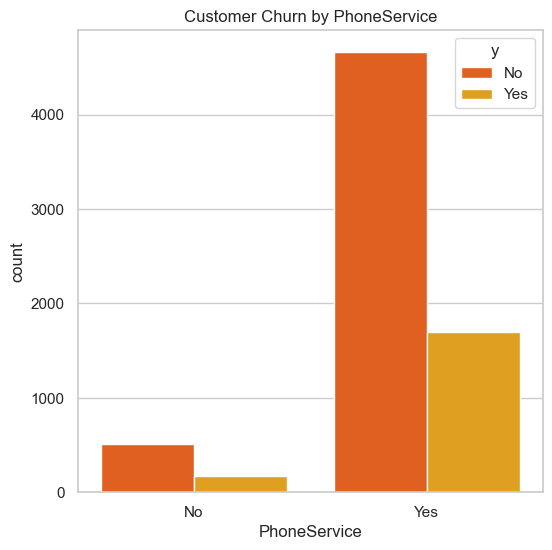

In [50]:
# Phone Service column
plt.figure(figsize=(6,6))
sns.countplot(x='PhoneService', data=data_churn, hue='y',palette="autumn")
plt.title('Customer Churn by PhoneService')
plt.show()

In [51]:
PhoneService_y = pd.crosstab(index = data_churn['PhoneService'], columns = data_churn['y'])
PhoneService_y

y,No,Yes
PhoneService,,
No,512,170
Yes,4662,1699


In [52]:
# Phone service doesnt seem to have impact on Customer Churn

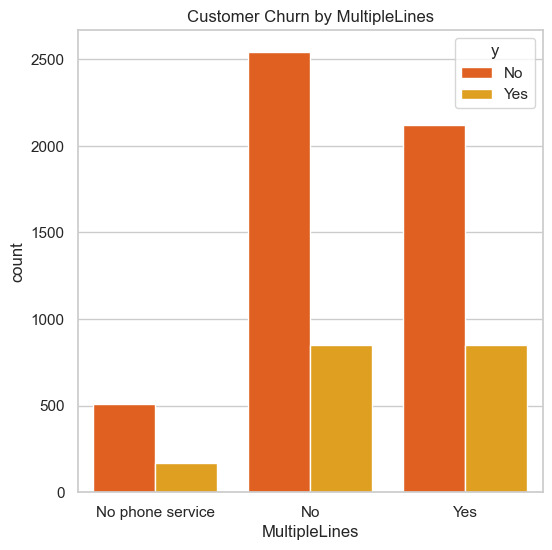

In [53]:
# MultipleLines column
plt.figure(figsize=(6,6))
sns.countplot(x='MultipleLines', data=data_churn, hue='y',palette="autumn")
plt.title('Customer Churn by MultipleLines')
plt.show()

In [54]:
MultipleLines_y = pd.crosstab(index = data_churn['MultipleLines'], columns = data_churn['y'])
MultipleLines_y

y,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


In [55]:
# ~29% customers with Multiple lines tend to leave, 25% customers with no phone service leave

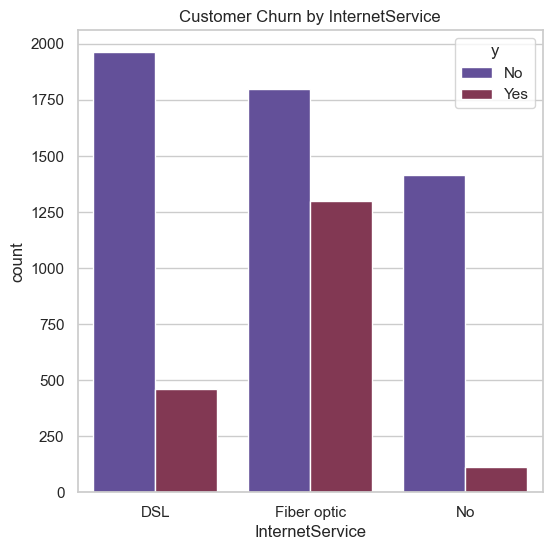

In [56]:
# InternetService column
plt.figure(figsize=(6,6))
sns.countplot(x='InternetService', data=data_churn, hue='y',palette="twilight")
plt.title('Customer Churn by InternetService')
plt.show()

In [57]:
InternetService_y = pd.crosstab(index = data_churn['InternetService'], columns = data_churn['y'])
InternetService_y

y,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [58]:
# Nearly, 40% customers churn who have opted for FiberOptic internet service as compared to 19% in case of DSL
# Let us dig deeper into the possible reason of customers opting for FiberOptic internet service

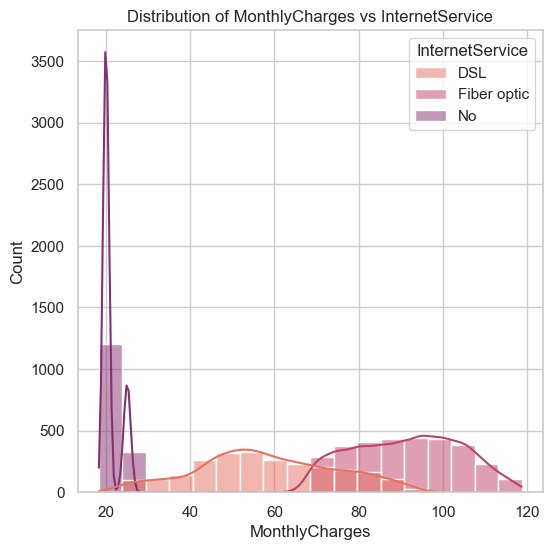

In [59]:
# Monthly charges vs Internet Services
plt.figure(figsize=(6,6))
sns.histplot(data = data_churn, x= "MonthlyCharges", hue="InternetService",kde= True,palette="flare")
plt.title("Distribution of MonthlyCharges vs InternetService")
plt.show()

In [60]:
# Average Monthly charge for Fiber optic customers is much higher than customers who have opted for DSL

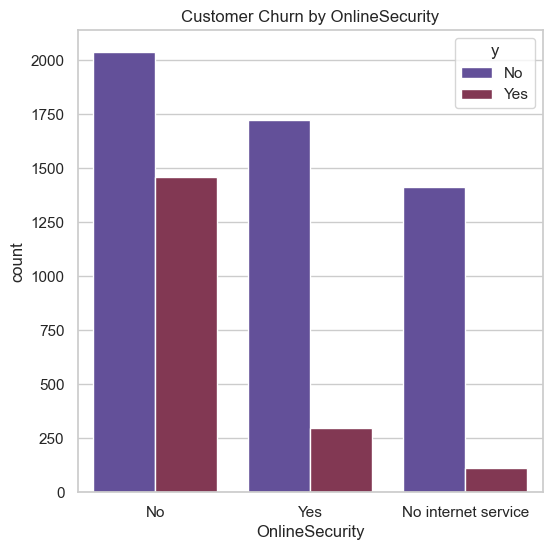

In [61]:
# Let us now focus on customers with different services, we can create one column block for these features
# OnlineSecurity column
plt.figure(figsize=(6,6))
sns.countplot(x='OnlineSecurity', data=data_churn, hue='y',palette="twilight")
plt.title('Customer Churn by OnlineSecurity')
plt.show()

In [62]:
OnlineSecurity_y = pd.crosstab(index = data_churn['OnlineSecurity'], columns = data_churn['y'])
OnlineSecurity_y

y,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


In [63]:
# Let us look at additional service features together in one frame

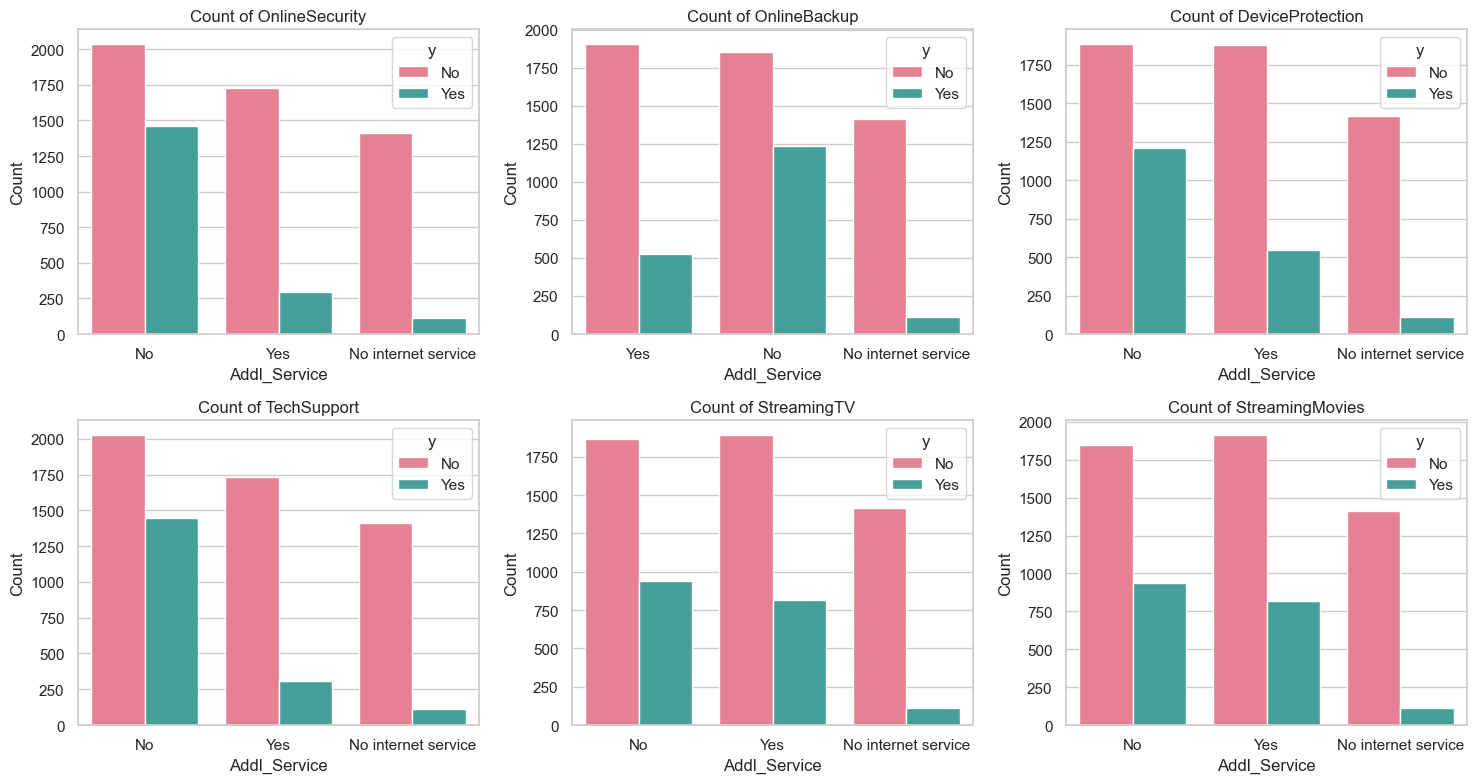

In [64]:
addl_service_columns = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

# Set up subplots
num_cols = len(addl_service_columns)
fig, axes = plt.subplots(nrows=2, ncols=(num_cols + 1) // 2, figsize=(15, 8))
axes = axes.flatten()  # Flatten to easily iterate

# Iterate over each column and create a count plot
for i, col in enumerate(addl_service_columns):
    sns.countplot(data=data_churn, x=col, ax=axes[i], palette="husl", hue = "y")
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('Addl_Service')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [65]:
# Let us look at significant columns one by one

In [66]:
OnlineBackup_y = pd.crosstab(index = data_churn['OnlineBackup'], columns = data_churn['y'])
OnlineBackup_y

y,No,Yes
OnlineBackup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


In [67]:
DeviceProtection_y = pd.crosstab(index = data_churn['DeviceProtection'], columns = data_churn['y'])
DeviceProtection_y

y,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


In [68]:
# Summary of additional services categorical columns
# Nearly 40% customers who have no Online security feature is likely to churn as compared to 14% for customers who do have online security
# Nearly 40% customers with no online back up are likely to churn as compared to ones who have online back up
# Nearly 40% customers who have not opted for device protection are likely to churn as compared to the ones who do have device protection
# Nearly 40% customers who have not opted for Tech Support or have not reached out to Tech support are likely to have more churn rate
# Streaming services or movies do not seem to have impact on churn rates

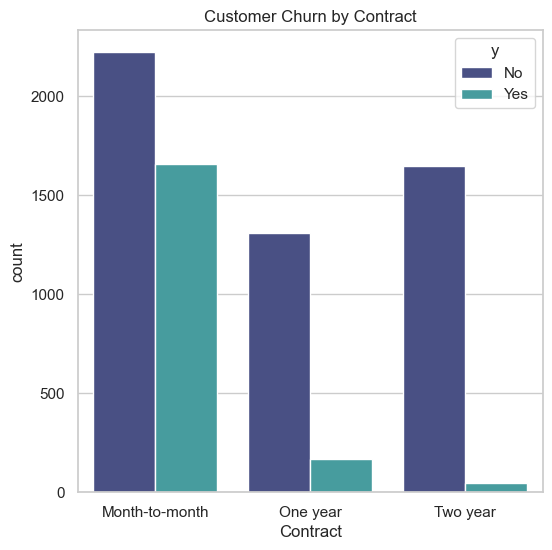

In [69]:
#  Contract column
plt.figure(figsize=(6,6))
sns.countplot(x='Contract', data=data_churn, hue='y',palette="mako")
plt.title('Customer Churn by Contract')
plt.show()

In [70]:
Contract_y = pd.crosstab(index = data_churn['Contract'], columns = data_churn['y'])
Contract_y

y,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [71]:
# 42% customers who have month to month contract are likely to leave, Churn rates are very less for customers who have either one or 2 year contract

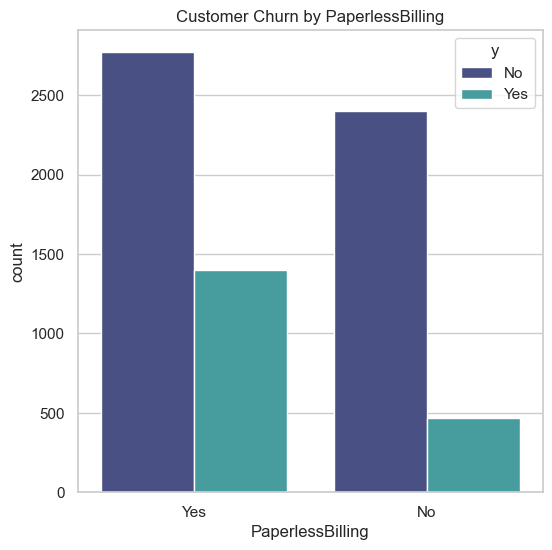

In [73]:
#   PaperlessBilling column
plt.figure(figsize=(6,6))
sns.countplot(x='PaperlessBilling', data=data_churn, hue='y',palette="mako")
plt.title('Customer Churn by PaperlessBilling')
plt.show()

In [74]:
PaperlessBilling_y = pd.crosstab(index = data_churn['PaperlessBilling'], columns = data_churn['y'])
PaperlessBilling_y

y,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [75]:
# Churn rates for customers with paperless billing is double as compared to ones who have not opted for Paperless billing

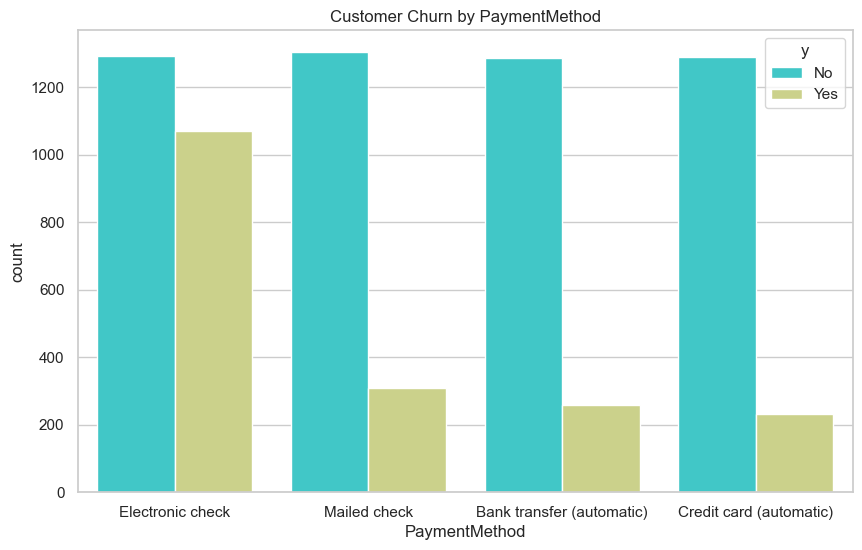

In [76]:
#   PaymentMethod column
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', data=data_churn, hue='y',palette="rainbow")
plt.title('Customer Churn by PaymentMethod')
plt.show()

In [77]:
PaymentMethod_y = pd.crosstab(index = data_churn['PaymentMethod'], columns = data_churn['y'])
PaymentMethod_y

y,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [78]:
# Nearly 45% of the customers who pay by electronic check are likely to leave as compared to other payment methods

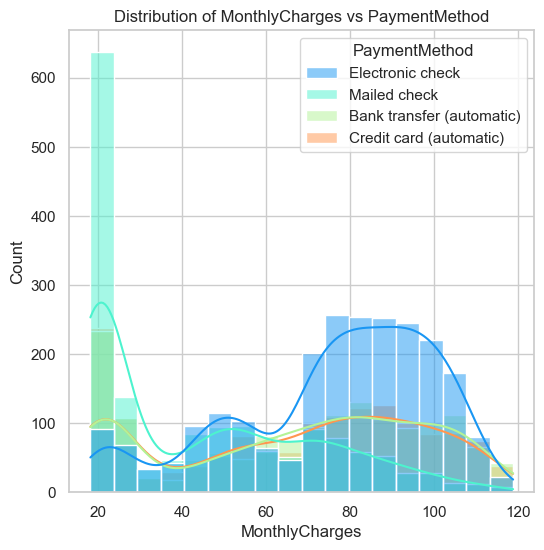

In [81]:
# Monthly charges vs PaymentMethod
plt.figure(figsize=(6,6))
sns.histplot(data = data_churn, x= "MonthlyCharges", hue="PaymentMethod",kde= True,palette="rainbow")
plt.title("Distribution of MonthlyCharges vs PaymentMethod")
plt.show()

In [82]:
print(data_churn.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'y'],
      dtype='object')


In [83]:
categorical_cols  = ['gender','Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       "y"]

In [84]:
print(numerical_cols)

['MonthlyCharges', 'TotalCharges', 'tenure']


In [85]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = "first", sparse_output=False)
ohe_data = ohe.fit_transform(data_churn[categorical_cols])

In [86]:
encoded_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(categorical_cols))

In [87]:
encoded_df.head(5)

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,y_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [88]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_data = ss.fit_transform(data_churn[numerical_cols])

In [89]:
ss_df = pd.DataFrame(ss_data, columns=numerical_cols)

In [90]:
ss_df.head()

,MonthlyCharges,TotalCharges,tenure
0,-1.160323,-0.994242,-1.277445
1,-0.259629,-0.173244,0.066327
2,-0.362660,-0.959674,-1.236724
3,-0.746535,-0.194766,0.514251
4,0.197365,-0.940470,-1.236724


In [91]:
data_churn = pd.concat([encoded_df, ss_df], axis=1)

In [92]:
data_churn.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,y_Yes,MonthlyCharges,TotalCharges,tenure
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.160323,-0.994242,-1.277445
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.259629,-0.173244,0.066327
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.362660,-0.959674,-1.236724
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.746535,-0.194766,0.514251
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.197365,-0.940470,-1.236724


In [93]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender_Male                            7043 non-null   float64
 1   Partner_Yes                            7043 non-null   float64
 2   Dependents_Yes                         7043 non-null   float64
 3   PhoneService_Yes                       7043 non-null   float64
 4   MultipleLines_No phone service         7043 non-null   float64
 5   MultipleLines_Yes                      7043 non-null   float64
 6   InternetService_Fiber optic            7043 non-null   float64
 7   InternetService_No                     7043 non-null   float64
 8   OnlineSecurity_No internet service     7043 non-null   float64
 9   OnlineSecurity_Yes                     7043 non-null   float64
 10  OnlineBackup_No internet service       7043 non-null   float64
 11  Onli

In [94]:
# Let us first define X and Y
X= X = data_churn.drop(columns=['y_Yes',"TotalCharges"])
Y=data_churn.iloc[:,-4]

In [95]:
!pip install imblearn

In [96]:
from imblearn.over_sampling import SMOTE
over_sampled = SMOTE()
X_resampled, Y_resampled = over_sampled.fit_resample(X,Y)

In [97]:
from collections import Counter

In [98]:
counter = Counter(Y_resampled)
print(counter)

Counter({0.0: 5174, 1.0: 5174})


## Model Building

In [99]:
# Let us start with the model
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,Y_resampled,test_size=0.25)

### Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(X_train,Y_train)

LogisticRegression()

In [101]:
y_pred=lgr.predict(X_test)

In [102]:
df=pd.DataFrame({"Actual":Y_test,"Predicted":y_pred})

In [103]:
df.head(10)

,Actual,Predicted
2889,0.0,0.0
5642,0.0,0.0
5703,0.0,0.0
5190,0.0,1.0
4025,1.0,1.0
1805,0.0,0.0
5049,1.0,0.0
6595,0.0,0.0
7070,1.0,1.0
1400,0.0,0.0


In [104]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [105]:
cm=print("Confusion Matrix:\n", confusion_matrix(Y_test,y_pred))
print(cm)

Confusion Matrix:
 [[ 972  348]
 [ 251 1016]]
None


In [106]:
cr=classification_report(Y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      1320
         1.0       0.74      0.80      0.77      1267

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587



In [107]:
accuracy_value = accuracy_score(Y_test,y_pred)

In [108]:
print("The accuracy score of the model using logistic regression is: ",accuracy_value)

The accuracy score of the model using logistic regression is:  0.768457672980286


In [109]:
from sklearn.model_selection import cross_val_score, cross_validate
model = LogisticRegression(max_iter=1000)
cross_score = cross_val_score(model,X_train,Y_train,cv=5,scoring='accuracy')
cross_score

array([0.76239536, 0.74871134, 0.78350515, 0.76159794, 0.78865979])

In [110]:
avg_score = np.mean(cross_score)
print("The accuracy score of the model using logistic regression is: ",avg_score)

The accuracy score of the model using logistic regression is:  0.76897391812322


### Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [112]:
#initiate the model
dt=DecisionTreeClassifier(random_state=80)
#Hyper tuning the parameters to find the relevant parameter
params = {'max_depth':list(range(1,21)), 'criterion':['gini', 'entropy']}
cv_model = GridSearchCV(dt, param_grid = params,cv=5,return_train_score=True)
cv_model.fit(X_train,Y_train)
X_cv_dt_results = pd.DataFrame(cv_model.cv_results_)
print(cv_model.best_params_)

{'criterion': 'entropy', 'max_depth': 9}


In [113]:
X_cv_dt_results[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False).head()

,params,mean_test_score
28,"{'criterion': 'entropy', 'max_depth': 9}",0.805052
8,"{'criterion': 'gini', 'max_depth': 9}",0.804021
9,"{'criterion': 'gini', 'max_depth': 10}",0.802217
30,"{'criterion': 'entropy', 'max_depth': 11}",0.801573
29,"{'criterion': 'entropy', 'max_depth': 10}",0.800542


In [114]:
model_dt = DecisionTreeClassifier(max_depth = 9, random_state=80)
cross_score_dt = cross_val_score(model_dt,X_train,Y_train,cv=5,scoring='accuracy')
cross_score_dt

array([0.79652286, 0.7931701 , 0.81443299, 0.8060567 , 0.80992268])

In [115]:
avg_score_dt = np.mean(cross_score_dt)
print("The Accuracy score of Decision Tree is ",avg_score_dt)

The Accuracy score of Decision Tree is  0.8040210666418837


In [116]:
y_pred_dt=cv_model.predict(X_test)

In [117]:
df=pd.DataFrame({"Actual":Y_test,"Predicted":y_pred_dt})

In [118]:
df.head(10)

,Actual,Predicted
2889,0.0,0.0
5642,0.0,0.0
5703,0.0,0.0
5190,0.0,1.0
4025,1.0,1.0
1805,0.0,0.0
5049,1.0,0.0
6595,0.0,0.0
7070,1.0,1.0
1400,0.0,0.0


In [119]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [120]:
cm=print("Confusion Matrix:\n", confusion_matrix(Y_test,y_pred_dt))
print(cm)

Confusion Matrix:
 [[1007  313]
 [ 229 1038]]
None


In [121]:
cr=classification_report(Y_test,y_pred_dt)
print(cr)

              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79      1320
         1.0       0.77      0.82      0.79      1267

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587



In [122]:
accuracy_value_dt = accuracy_score(Y_test,y_pred_dt)

In [123]:
print("The accuracy score of the model using Decision Tree is: ",accuracy_value_dt)

The accuracy score of the model using Decision Tree is:  0.7904909161190569


### Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
ft=RandomForestClassifier()
#Hyper tuning the parameters to find the relevant parameter
params = {'n_estimators':list(range(1,150))}
rs_ft = RandomizedSearchCV(estimator=ft,param_distributions=params,cv=5, return_train_score=True)
rs_ft.fit(X_train,Y_train)
X_rscv_results = pd.DataFrame(rs_ft.cv_results_)

In [125]:
X_rscv_results = X_rscv_results.sort_values(by = 'param_n_estimators' )
X_rscv_results.sort_values(by='mean_test_score', ascending=False)[['param_n_estimators','mean_test_score']].head()

,param_n_estimators,mean_test_score
3,97,0.847959
7,120,0.847315
5,82,0.845769
6,103,0.845381
1,131,0.845124


In [126]:
### from the above we can see that 97 estimators is optimum
params = {'n_estimators':list(range(2,130))}
ft = RandomForestClassifier()
gs_ft = GridSearchCV(estimator=ft,param_grid=params,cv=5, return_train_score=True)
gs_ft.fit(X_train,Y_train)
X_cv_results = pd.DataFrame(gs_ft.cv_results_)

In [127]:
X_cv_results = X_cv_results.sort_values(by = 'param_n_estimators' )
X_cv_results.sort_values(by='mean_test_score', ascending=False)[['param_n_estimators','mean_test_score']].head()

,param_n_estimators,mean_test_score
125,127,0.848475
121,123,0.848474
103,105,0.848346
99,101,0.848346
95,97,0.848218


In [132]:
rf_model = RandomForestClassifier(n_estimators=127,random_state=80) 
cross_score_rf = cross_val_score(rf_model,X_train,Y_train,cv=5,scoring='accuracy')
cross_score_rf.mean()

0.8480871741424977

In [133]:
print("The accuracy score of the model using Random Forest is: ",cross_score_rf.mean())

The accuracy score of the model using Random Forest is:  0.8480871741424977


In [134]:
y_pred_rf=gs_ft.predict(X_test)

In [135]:
df=pd.DataFrame({"Actual":Y_test,"Predicted":y_pred_rf})

In [136]:
df.head(10)

,Actual,Predicted
2889,0.0,0.0
5642,0.0,0.0
5703,0.0,0.0
5190,0.0,1.0
4025,1.0,1.0
1805,0.0,0.0
5049,1.0,0.0
6595,0.0,0.0
7070,1.0,1.0
1400,0.0,0.0


In [137]:
cm=print("Confusion Matrix:\n", confusion_matrix(Y_test,y_pred_rf))
print(cm)

Confusion Matrix:
 [[1089  231]
 [ 167 1100]]
None


In [138]:
cr=classification_report(Y_test,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85      1320
         1.0       0.83      0.87      0.85      1267

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



In [139]:
accuracy_value_rf = accuracy_score(Y_test,y_pred_rf)

In [140]:
print("The accuracy score of the model using Random Forest is: ", accuracy_value_rf)

The accuracy score of the model using Random Forest is:  0.8461538461538461


### XGBoost

In [141]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [142]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Assume Y_train is your target variable
# Convert target variable to numeric
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.fit_transform(Y_test)

# Define your XGBoost model
xgb_model = xgb.XGBClassifier()

# Define your parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
}

# Perform GridSearchCV
gs_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1)
gs_xgb.fit(X_train, Y_train_encoded)

# If you want to see the results
print("Best parameters found: ", gs_xgb.best_params_)


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [143]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth= 5, n_estimators = 100)
xgb_model.fit(X_train, Y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [144]:
y_pred_xgb = xgb_model.predict(X_test)

In [147]:
df=pd.DataFrame({"Actual":Y_test,"Predicted":y_pred_xgb})
df.head()

,Actual,Predicted
2889,0.0,0
5642,0.0,0
5703,0.0,0
5190,0.0,1
4025,1.0,1


In [146]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_test_encoded = label_encoder.fit_transform(Y_test)
cm = confusion_matrix(Y_test_encoded, y_pred_xgb)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1061  259]
 [ 151 1116]]


In [148]:
cr=classification_report(Y_test_encoded,y_pred_xgb)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1320
           1       0.81      0.88      0.84      1267

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587



In [149]:
accuracy_value_xgb = accuracy_score(Y_test_encoded,y_pred_xgb)

In [150]:
print("The accuracy score of the model using XGB Boost is: ", accuracy_value_xgb)

The accuracy score of the model using XGB Boost is:  0.8415152686509471


## Conclusion

In [151]:
print("The accuracy score of the model using logistic regression is: ",avg_score)
print("The accuracy score of the model using Decision Tree is: ",accuracy_value_dt)
print("The accuracy score of the model using Random Forest is: ", accuracy_value_rf)
print("The accuracy score of the model using XGB Boost is: ", accuracy_value_xgb)

The accuracy score of the model using logistic regression is:  0.76897391812322
The accuracy score of the model using Decision Tree is:  0.7904909161190569
The accuracy score of the model using Random Forest is:  0.8461538461538461
The accuracy score of the model using XGB Boost is:  0.8415152686509471
